# Projeto Módulo 4 | Análise Exploratória de Dados (EDA) - Estatística 

Análise Exploratória de Dados refere-se ao processo crítico de realizar investigações iniciais nos dados para descobrir padrões, identificar anomalias, testar hipóteses e verificar pressupostos com a ajuda de estatísticas resumidas e representações gráficas.

## Objetivo do Projeto
Compreender as distribuições potenciais dos dados, analisar as estatísticas descritivas, investigar correlações entre variáveis quantitativas e explorar testes de hipótese são objetivos fundamentais deste projeto. Além disso, serão empregadas técnicas de visualização de dados, como gráficos de comparação, correlação e distribuição de acordo com a necessidade da análise.

## A base de dados
A base de dados _Microdados do Enem 2022_ consiste em informações detalhadas coletadas durante o processo de exame, sob a condução do Inep. Esses conjuntos de dados fornecem informações precisas, incluindo os exames, os gabaritos, os detalhes dos itens, as notas e o questionário respondido pelos participantes do Enem. Essas variáveis possibilitam que gestores, pesquisadores, instituições e interessados no campo educacional realizem análises e tabulações de dados relevantes para apoiar diagnósticos, estudos, pesquisas e monitoramento de estatísticas e informações educacionais. O ENEM consiste em 4 testes objetivos, cada um contendo 45 questões de múltipla escolha e uma redação. No total, são 180 questões de múltipla escolha, distribuídas igualmente em 4 áreas de conhecimento: _linguagens, códigos e suas tecnologias_ (que incluem Língua Portuguesa, Língua Estrangeira Moderna, Literatura, Artes, Educação Física, Tecnologia da Informação e Comunicação); _matemática e suas tecnologias_ (com conteúdos de matemática e geometria); _ciências da natureza e suas tecnologias_ (com conteúdos de Química, Física e Biologia); e _ciências humanas e suas tecnologias_ (com conteúdos de Geografia, História, Filosofia, Sociologia e Conhecimentos Gerais). O ENEM é realizado ao longo de dois dias, geralmente sábado e domingo. Os candidatos podem se inscrever para o exame através do site do INEP, preenchendo todas as informações pessoais necessárias. 

Os dados coletados pelo INEP estão disponíveis de forma compactada em _https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem_ e, para o ano de 2022 possui o tamanho de 592 MiB, o que inclui diversos arquivos auxiliares. Nos interessamos especificamente pelo arquivo MICRODADOS_ENEM_2022.csv, o qual descompactado soma 1,5GiB. Também faremos uso do arquivo Dicionário_Microdados_Enem_2022.ods, o qual apresenta a descrição das colunas na base de dados. Os outros arquivos fornecidos conjuntamente, os quais não serão abordados no presente projeto, contém as diferentes provas em formato PDF além de diversos manuais e os folhetos disponibilizados aos participantes. Também são fornecidos scripts para os principais softwares de análise estatística usados no mercado, como R, SAS e SPSS. 

### Problema
Gostaríamos de entender observar a relação entre o desempenho de um candidato e fatores como renda dos pais, formação dos pais e acesso a internet. Temos a hipótese de que renda familiar é o melhor indicador do desempenho de um canditato. 


### Carregando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch


### Primeiro contato com a base de dados

In [2]:
df = pd.read_csv('MICRODADOS_ENEM_2022.csv', encoding='latin-1', sep = ';')
df.head(5)


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [3]:
pd.set_option('display.max_rows', None)
print(df.dtypes)

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

### Descrição dos dados

In [4]:
# Read the HTML file
with open('Dicionário_Microdados_Enem_2022.htm', 'r') as f:
    html_content = f.read()

# Display the HTML content
display(HTML(html_content))

# Pre processamento

## Seleção das colunas desejadas para análise
    SG_UF_PROVA: Sigla da Unidade da Federação da aplicação da prova
    TP_FAIXA_ETARIA: Faixa Etária
    TP_SEXO: Sexo
    TP_ESTADO_CIVIL:  Esstado civil
    TP_COR_RACA: cor/Raça
    TP_ESCOLA: Escola Pública ou Privada
    TP_NACIONALIDADE: Nacionalidade
    TP_PRESENCA_CN, TP_PRESENCA_LC, TP_PRESENCA_MT, TP_PRESENCA_CH: Presença nas diversas avaliações
    IN_TREINEIRO: Candidato treineiro
    NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO: Nota nas diversas avaliações
    Q001: Nível educacional do pai
    Q002: Nível educacional da mãe
    Q005: Número de pessoas que habitam na mesma casa
    Q006: Renda familiar
    Q024: Tem computador
    Q025: Tem internet

In [5]:
usecols = ["SG_UF_PROVA", "TP_FAIXA_ETARIA","TP_SEXO","TP_ESTADO_CIVIL","TP_COR_RACA","TP_ESCOLA","TP_NACIONALIDADE","TP_PRESENCA_CN","TP_PRESENCA_LC","TP_PRESENCA_MT","TP_PRESENCA_CH","IN_TREINEIRO","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","Q001","Q002","Q005","Q006","Q024","Q025"]
df = pd.read_csv('MICRODADOS_ENEM_2022.csv', encoding='latin-1', sep = ';', usecols = usecols)
df.shape

(3476105, 23)

## Remoção das linhas indesejadas
- Estudante faltou alguma prova e foi desclassificado
- Treineiros

In [6]:
print("Total de linhas antes de excluir os faltosos: ", len(df))
df = df[df['TP_PRESENCA_CN'] != 0]
df = df[df['TP_PRESENCA_CH'] != 0]
df = df[df['TP_PRESENCA_LC'] != 0]
df = df[df['TP_PRESENCA_MT'] != 0]
df = df[df['IN_TREINEIRO'] == 0]
nulos = len(df)
df = df.dropna()
nulos = nulos - len(df)
print("Número de linhas com valores faltantes: ", nulos) 
print("Número de linhas após remoções: ", len(df))

Total de linhas antes de excluir os faltosos:  3476105
Número de linhas com valores faltantes:  1636
Número de linhas após remoções:  1927753


## Renomeando colunas para facilitar a leitura
    Q001: Ensino_Pai
    Q002: Ensino_Mae
    Q005: Pessoas_casa
    Q006: Renda
    Q024: Computador
    Q025: Internet

In [7]:
df = df.rename(columns={'Q001': 'Ensino_Pai'})
df = df.rename(columns={'Q002': 'Ensino_Mae'})
df = df.rename(columns={'Q005': 'Pessoas_casa'})
df = df.rename(columns={'Q006': 'Renda'})
df = df.rename(columns={'Q024': 'Computador'})
df = df.rename(columns={'Q025': 'Internet'})

In [8]:
df.shape

(1927753, 23)

# Primeira visão geral sobre os dados

Obteremos algumas propriedades das seguintes colunas:
- NU_NOTA_CN
- NU_NOTA_CH
- NU_NOTA_LC
- NU_NOTA_MT
- NU_NOTA_REDACAO

E usaremos as seguintes funçòes de agregação:
- Count (Contagem): Esta função retorna o número de linhas não nulas em cada coluna do dataframe. Ou seja, ela conta quantos valores existem em cada coluna, excluindo os valores nulos.
- Mean (Média): A função de média calcula a média aritmética dos valores em cada coluna. Ela soma todos os valores e divide pelo número de valores não nulos.
- Standard Deviation (Desvio Padrão): O desvio padrão é uma medida de dispersão que indica o quão distantes os valores estão da média. Valores maiores de desvio padrão indicam maior dispersão dos dados em relação à média.
- Minimum (Mínimo - Percentil 0%): Esta é a medida mais baixa encontrada em cada coluna. Representa o valor mínimo observado.
- Percentile 25% (Percentil 25%): O percentil 25% indica que 25% dos valores em cada coluna estão abaixo desse ponto. É também conhecido como o primeiro quartil.
- Percentile 50% (Percentil 50%): O percentil 50%, também chamado de mediana, é o valor que divide a distribuição ao meio, com metade dos valores abaixo e metade acima desse ponto.
- Percentile 75% (Percentil 75%): O percentil 75% indica que 75% dos valores em cada coluna estão abaixo desse ponto. É também conhecido como o terceiro quartil.
- Maximum (Máximo - Percentil 100%): Esta é a medida mais alta encontrada em cada coluna. Representa o valor máximo observado.

In [9]:
cols = [ "Ensino_Pai", "Ensino_Mae", "Renda", "Computador", "Internet", "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
df[cols].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,1927753.00,1927753.00,1927753.00,1927753.00,1927753.00
mean,497.42,530.61,519.94,542.09,627.46
std,73.26,80.86,76.91,117.41,203.90
min,0.00,0.00,0.00,0.00,0.00
25%,440.80,479.50,470.80,447.40,540.00
50%,486.70,532.50,527.40,529.00,620.00
75%,545.60,585.70,575.40,622.10,780.00
max,875.30,839.20,801.00,985.70,1000.00


## Visualização dos dados
- Histograma de Distribuição das notas nas diversas provas (variável aleatória a ser observada)
- Distribução por Estado
- Distribuição por Sexo do candidato
- Tipo de Escola
- Nível educacional do pai
- Nível educacional da mãe
- Renda familiar
- Número de indivíduos morando na mesma residência
- Presença de computador e acesso à internet na residência


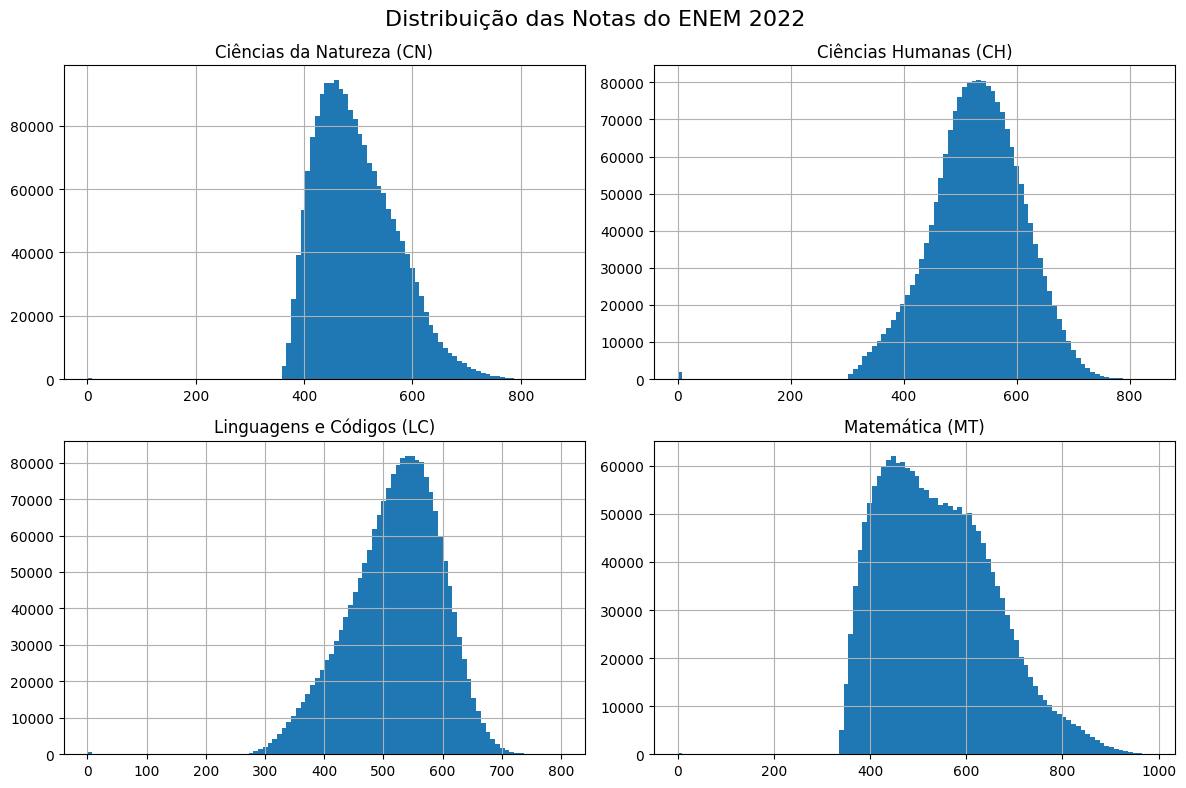

In [10]:
df.hist(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], bins=100, figsize=(12, 8))
plt.suptitle('Distribuição das Notas do ENEM 2022', fontsize=16)
plt.subplots_adjust(top=0.9)  
plt.subplot(2, 2, 1).set_title('Ciências da Natureza (CN)')
plt.subplot(2, 2, 2).set_title('Ciências Humanas (CH)')
plt.subplot(2, 2, 3).set_title('Linguagens e Códigos (LC)')
plt.subplot(2, 2, 4).set_title('Matemática (MT)')
plt.tight_layout() 
plt.show()


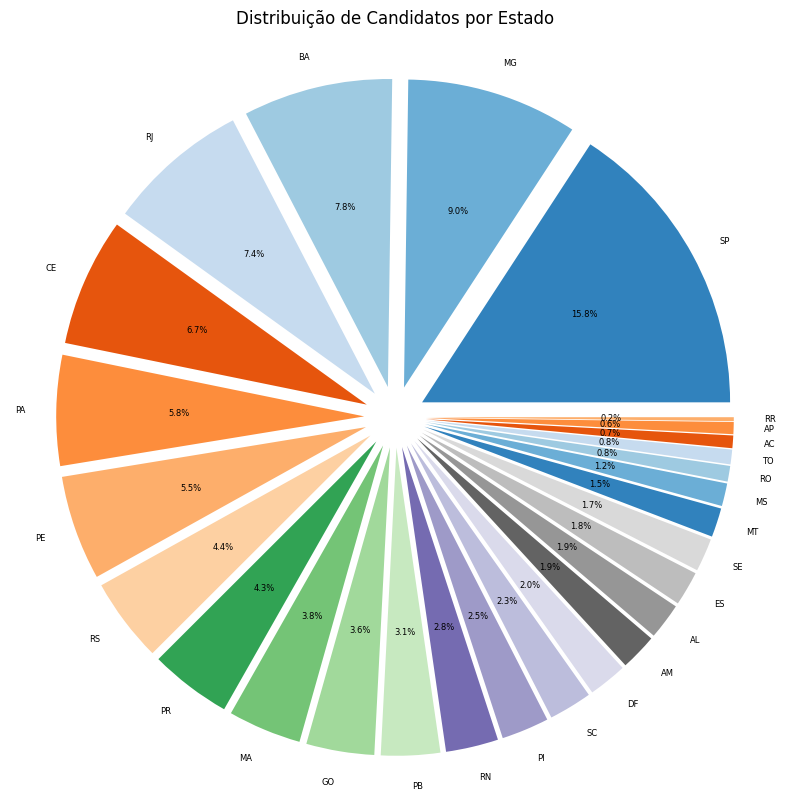

In [11]:
state_counts = df['SG_UF_PROVA'].value_counts()
labels = state_counts.index
sizes = state_counts.values
total = sizes.sum()
colors = plt.cm.tab20c.colors 
explode = [0.1] * len(sizes)
def fmt(x):
    return f'{x:.1f}%'
plt.figure(figsize=(10, 10)) 
plt.pie(sizes, labels=labels, autopct=fmt, colors=colors, explode=explode, shadow=False, textprops={'fontsize': 6}) 
plt.title("Distribuição de Candidatos por Estado")
plt.show()




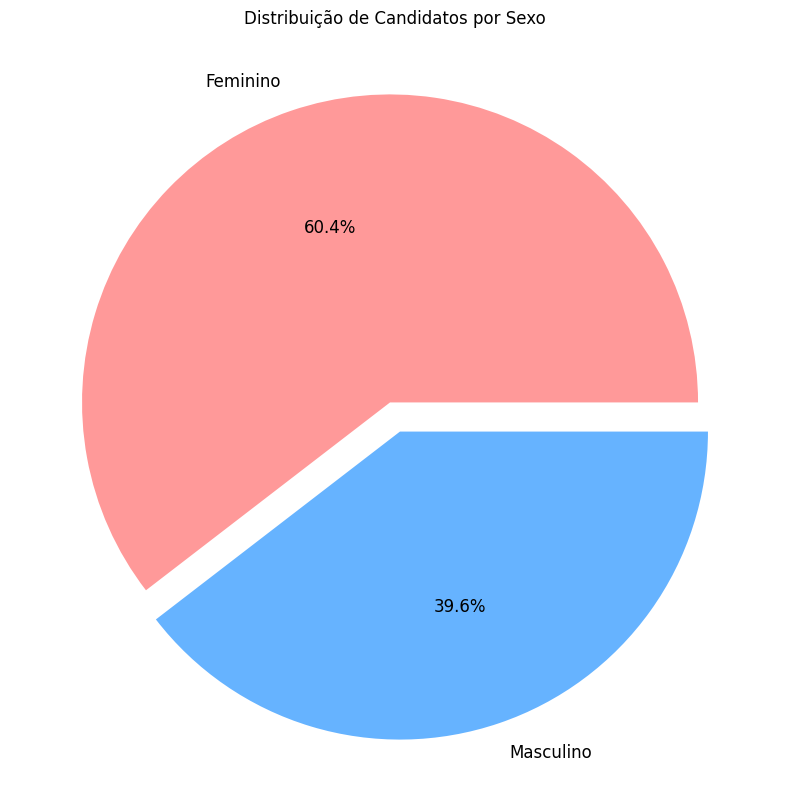

In [12]:
state_counts = df['TP_SEXO'].value_counts()
labels = state_counts.index
sizes = state_counts.values
total = sizes.sum()
colors = ['#ff9999', '#66b3ff'] 
labels = ['Masculino' if label == 'M' else 'Feminino' for label in labels]
explode = [0.05] * len(sizes)  
def fmt(x):
    return f'{x:.1f}%'
plt.figure(figsize=(10, 10)) 
plt.pie(sizes, labels=labels, autopct=fmt, colors=colors, explode=explode, shadow=False, textprops={'fontsize': 12}) 
plt.title("Distribuição de Candidatos por Sexo")
plt.show()




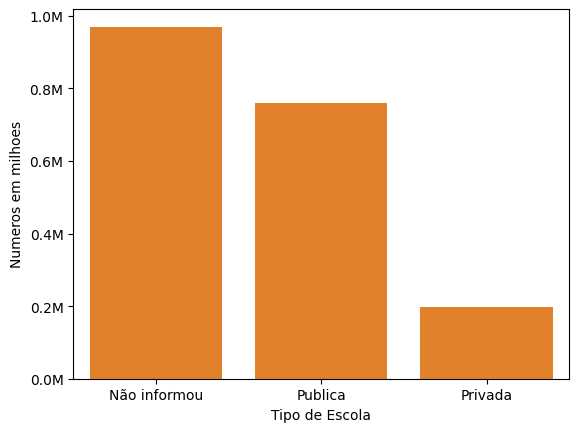

In [13]:
label_mapping = {2: 'Publica', 3: 'Privada', 1: 'Não informou'}
sns.countplot(x="TP_ESCOLA", data=df)
plt.xlabel('Tipo de Escola')  
plt.xticks(ticks=[0, 1, 2], labels=[label_mapping[label] for label in [1, 2, 3]]) 
ax = sns.countplot(x="TP_ESCOLA", data=df)
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ylabel('Numeros em milhoes')
plt.show()


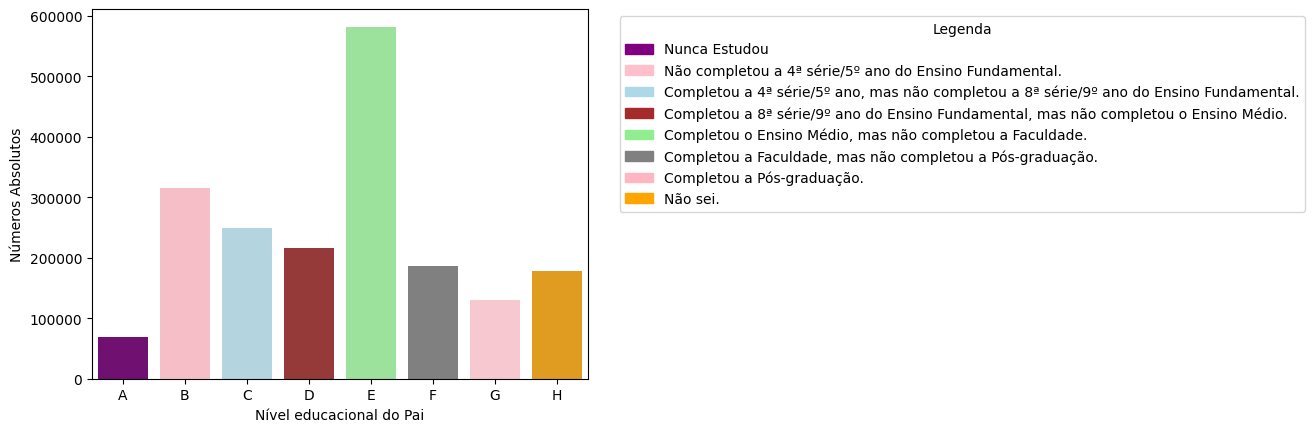

In [14]:
label_mapping = {
    'A': 'Nunca Estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei.'  
}
sorted_labels = sorted(label_mapping.keys())
custom_colors = ['lightgreen', 'lightblue', 'lightpink', 'orange', 'purple', 'brown', 'gray', 'pink']
ax = sns.countplot(x="Ensino_Pai", data=df, palette=custom_colors, order=sorted_labels, hue='Ensino_Pai')
plt.xlabel('Nível educacional do Pai')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7])
custom_colors = [ 'purple', 'pink', 'lightblue', 'brown', 'lightgreen',  'gray', 'lightpink', 'orange' ]
legend_elements = [Patch(label=label_mapping[label], color=color) for label, color in zip(sorted_labels, custom_colors)]
plt.legend(title="Legenda", handles=legend_elements, labels=[label_mapping[label] for label in sorted_labels], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Números Absolutos')
plt.show()


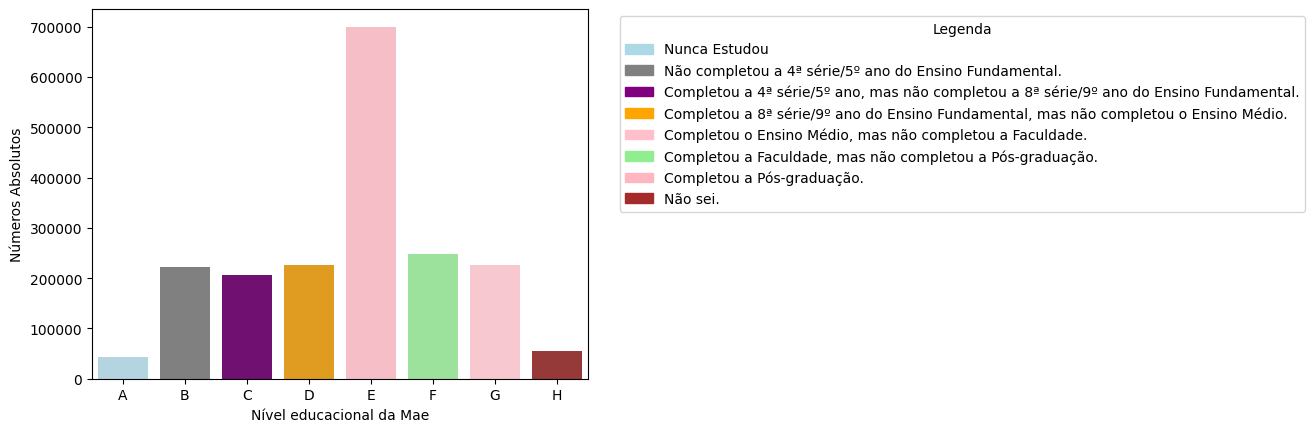

In [15]:
label_mapping = {
    'A': 'Nunca Estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei.'  
}
sorted_labels = sorted(label_mapping.keys())
custom_colors = ['lightgreen', 'lightblue', 'lightpink', 'orange', 'purple', 'brown', 'gray', 'pink']
ax = sns.countplot(x="Ensino_Mae", data=df, palette=custom_colors, order=sorted_labels, hue='Ensino_Mae')
plt.xlabel('Nível educacional da Mae')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7])
custom_colors = [ 'lightblue',  'gray', 'purple', 'orange' ,  'pink',  'lightgreen',  'lightpink', 'brown' ]
legend_elements = [Patch(label=label_mapping[label], color=color) for label, color in zip(sorted_labels, custom_colors)]
plt.legend(title="Legenda", handles=legend_elements, labels=[label_mapping[label] for label in sorted_labels], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Números Absolutos')
plt.show()

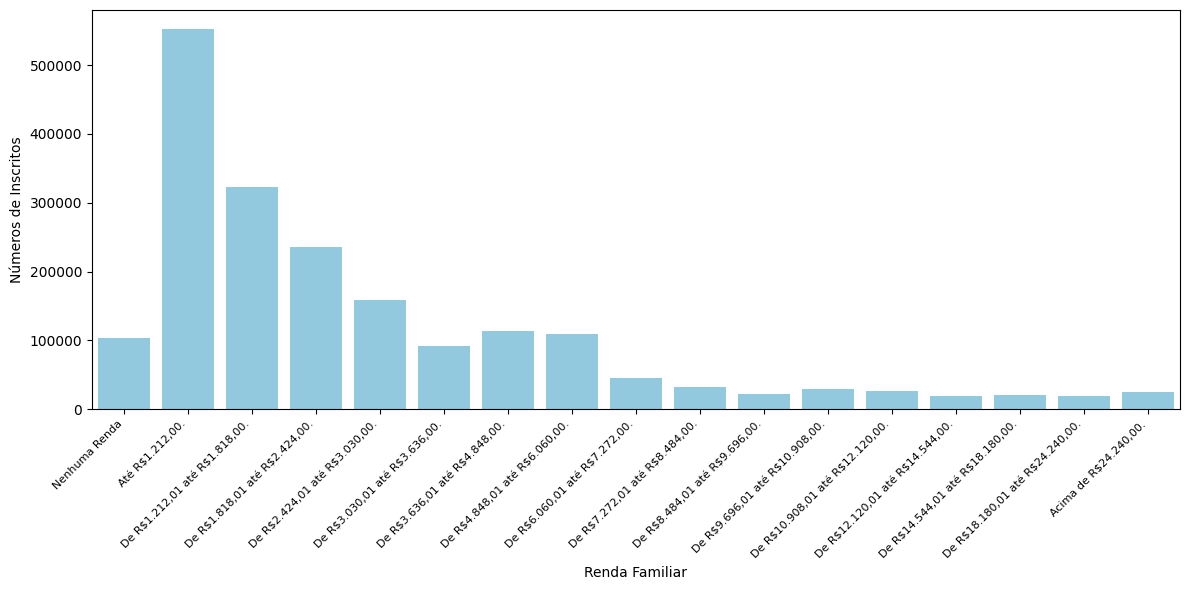

In [16]:
label_mapping = {
    'A': 'Nenhuma Renda',
    'B': 'Até R\$1.212,00.',
    'C': 'De R\$1.212,01 até R\$1.818,00.',
    'D': 'De R\$1.818,01 até R\$2.424,00.',
    'E': 'De R\$2.424,01 até R\$3.030,00.',
    'F': 'De R\$3.030,01 até R\$3.636,00.',
    'G': 'De R\$3.636,01 até R\$4.848,00.',
    'H': 'De R\$4.848,01 até R\$6.060,00.',
    'I': 'De R\$6.060,01 até R\$7.272,00.',
    'J': 'De R\$7.272,01 até R\$8.484,00.',
    'K': 'De R\$8.484,01 até R\$9.696,00.',
    'L': 'De R\$9.696,01 até R\$10.908,00.',
    'M': 'De R\$10.908,01 até R\$12.120,00.',
    'N': 'De R\$12.120,01 até R\$14.544,00.',
    'O': 'De R\$14.544,01 até R\$18.180,00.',
    'P': 'De R\$18.180,01 até R\$24.240,00.',
    'Q': 'Acima de R\$24.240,00.'  
}
sorted_labels = sorted(label_mapping.keys())
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(x="Renda", data=df, color='skyblue', order=sorted_labels)
plt.xlabel('Renda Familiar')
plt.ylabel('Números de Inscritos')
plt.xticks(ticks=range(len(sorted_labels)), labels=[f"{label_mapping[label]}" for label in sorted_labels], rotation=45, ha='right', fontsize=8)  # Adjust fontsize as needed
plt.tight_layout()  
plt.show()


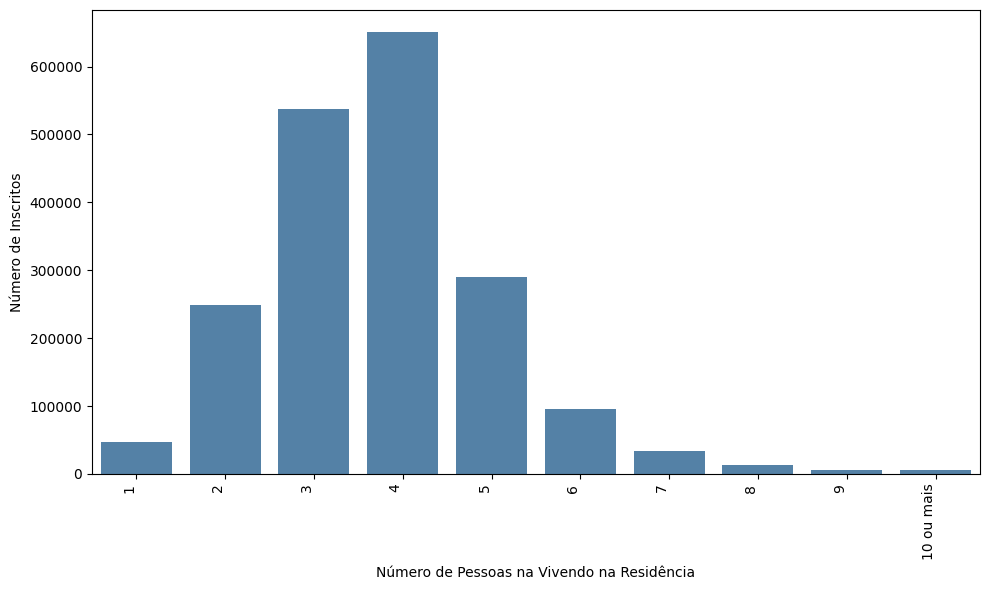

In [17]:
df['Pessoas_casa_aggregated'] = df['Pessoas_casa'].apply(lambda x: '10 ou mais' if x >= 10 else str(x))
single_color = "steelblue"
order_labels = [str(i) for i in range(1, 10)] + ['10 ou mais']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Pessoas_casa_aggregated", data=df, color=single_color, order=order_labels)
plt.xlabel('Número de Pessoas na Vivendo na Residência')
plt.ylabel('Número de Inscritos')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()  
plt.show()


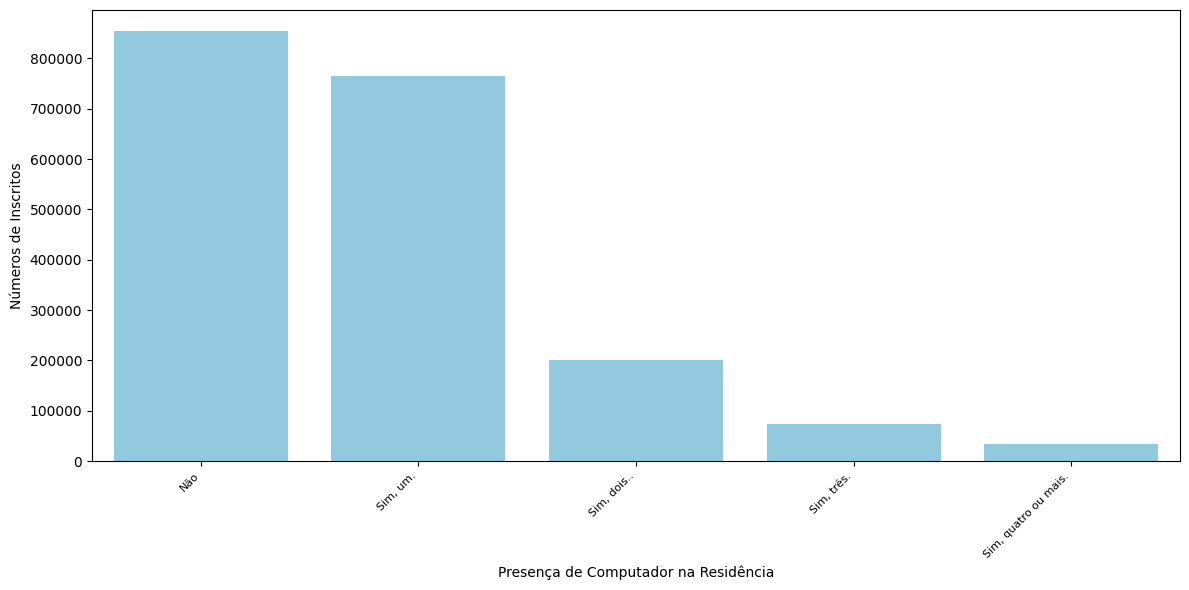

In [18]:
label_mapping = {
    'A': 'Não',
    'B': 'Sim, um.',
    'C': 'Sim, dois..',
    'D': 'Sim, três.',
    'E': 'Sim, quatro ou mais.'
    }
sorted_labels = sorted(label_mapping.keys())
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(x="Computador", data=df, color='skyblue', order=sorted_labels)
plt.xlabel('Presença de Computador na Residência')
plt.ylabel('Números de Inscritos')
plt.xticks(ticks=range(len(sorted_labels)), labels=[f"{label_mapping[label]}" for label in sorted_labels], rotation=45, ha='right', fontsize=8)  
plt.tight_layout()  
plt.show()


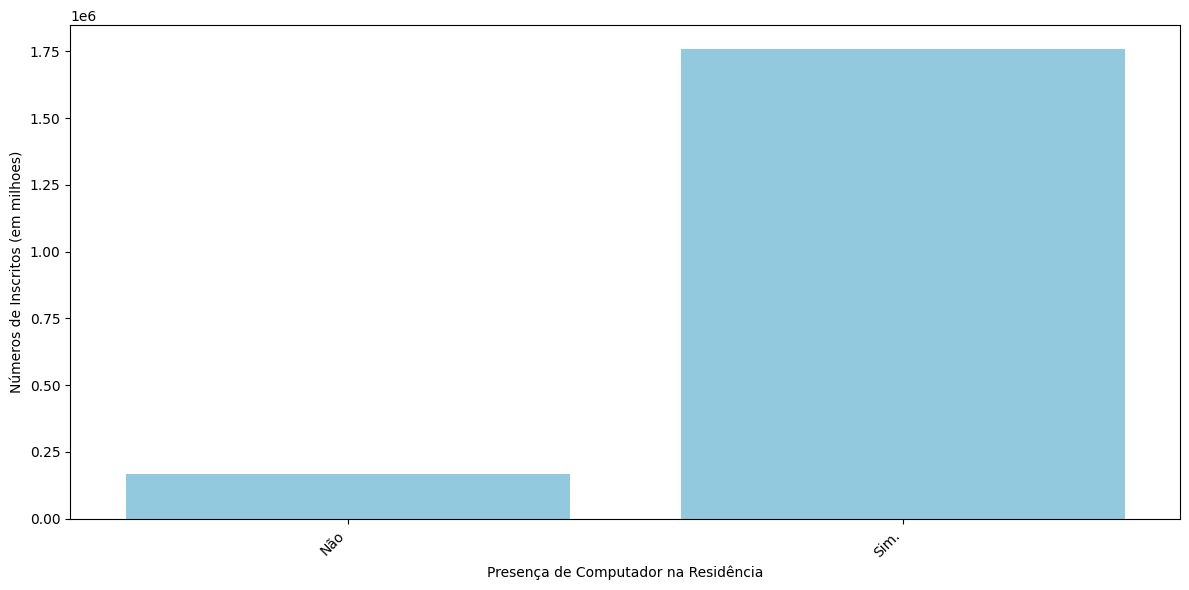

In [19]:
label_mapping = {
    'A': 'Não',
    'B': 'Sim.'
    }
sorted_labels = sorted(label_mapping.keys())
plt.figure(figsize=(12, 6))  
ax = sns.countplot(x="Internet", data=df, color='skyblue', order=sorted_labels)
plt.xlabel('Presença de Computador na Residência')
plt.ylabel('Números de Inscritos (em milhoes)')
plt.xticks(ticks=range(len(sorted_labels)), labels=[f"{label_mapping[label]}" for label in sorted_labels], rotation=45, ha='right', fontsize=10 ) 
plt.tight_layout()  
plt.show()



## Correlações


### Acesso a internet e desempenho linguístico
O boxplot resume a distribuição de uma variável numérica para um ou vários grupos. Ele permite obter rapidamente a mediana, os quartis e os outliers.

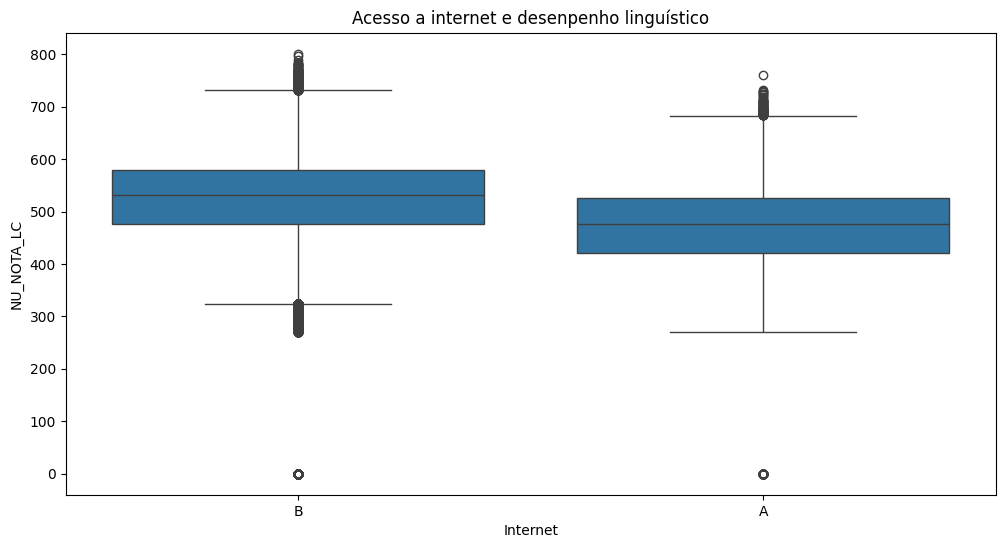

In [20]:
plt.figure(figsize = (12, 6))
sns.boxplot(
    data=df,
    x="Internet",
    y="NU_NOTA_LC",
    )
plt.title("Acesso a internet e desenpenho linguístico")
plt.show()


### Renda x Nota de Matemática

Um gráfico de violino permite visualizar a distribuição de uma variável numérica para um ou vários grupos. 

<Figure size 1200x600 with 0 Axes>

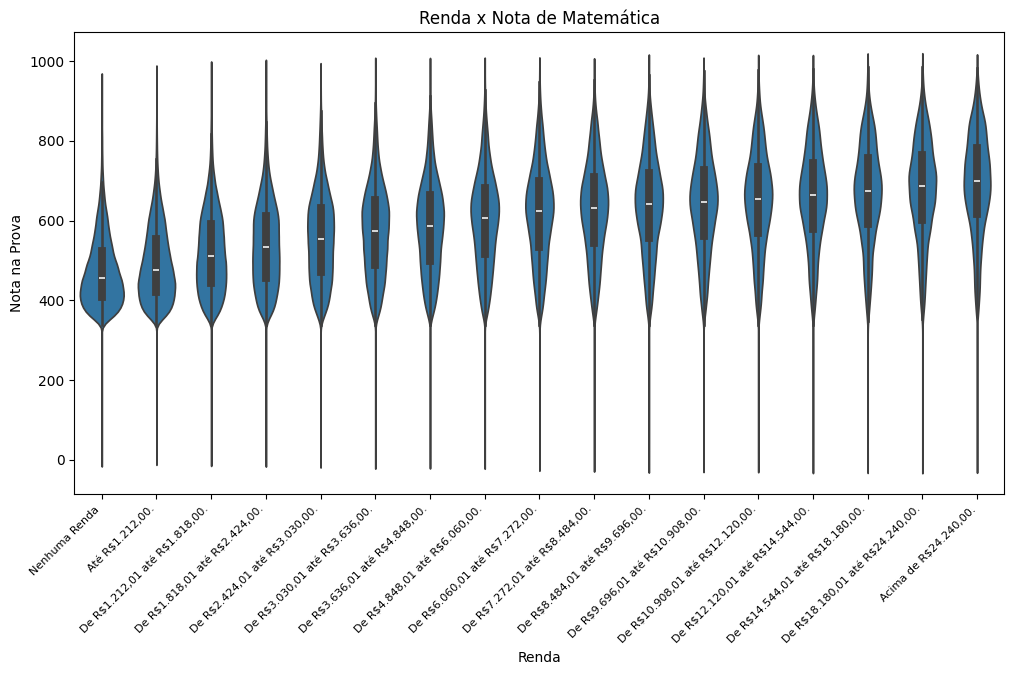

In [21]:
plt.figure(figsize=(12, 6))
label_mapping = {
    'A': 'Nenhuma Renda',
    'B': 'Até R\$1.212,00.',
    'C': 'De R\$1.212,01 até R\$1.818,00.',
    'D': 'De R\$1.818,01 até R\$2.424,00.',
    'E': 'De R\$2.424,01 até R\$3.030,00.',
    'F': 'De R\$3.030,01 até R\$3.636,00.',
    'G': 'De R\$3.636,01 até R\$4.848,00.',
    'H': 'De R\$4.848,01 até R\$6.060,00.',
    'I': 'De R\$6.060,01 até R\$7.272,00.',
    'J': 'De R\$7.272,01 até R\$8.484,00.',
    'K': 'De R\$8.484,01 até R\$9.696,00.',
    'L': 'De R\$9.696,01 até R\$10.908,00.',
    'M': 'De R\$10.908,01 até R\$12.120,00.',
    'N': 'De R\$12.120,01 até R\$14.544,00.',
    'O': 'De R\$14.544,01 até R\$18.180,00.',
    'P': 'De R\$18.180,01 até R\$24.240,00.',
    'Q': 'Acima de R\$24.240,00.'  
}

plt.figure(figsize=(12, 6))
order = sorted(label_mapping.keys())
sns.violinplot(
    data=df,
    x="Renda",
    y="NU_NOTA_MT",
    order=order,  
)
plt.title("Renda x Nota de Matemática")
plt.ylabel("Nota na Prova")
plt.xticks(ticks=range(len(order)), labels=[label_mapping[label] for label in order], rotation=45, ha='right', fontsize=8)  # Rotaciona os labels do eixo x
plt.show()



## Mapeando correlações

O coeficiente de correlação de Pearson mede a força de uma correlação linear. Essa correlação traça uma linha entre os dados de duas variáveis. O coeficiente de correlação de Pearson mostra o quão longe os dados estão dessa linha. Não é necessário que dados da mesma categoria sejam usados, nem que tenham a mesma unidade, pois a correlação é uma medida sem dimensão. Eles precisam ser dados numéricos.

In [22]:
ensino = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 0}
renda = {'A': 0, 'B': 1.2, 'C': 1.5, 'D': 2.1, 'E': 2.6, 'F': 3.0, 'G': 4.2, 'H': 5.4, 'I': 6.6, 'J': 7.8, 'K': 9, 'L': 10, 'M': 11.5, 'N': 13.0, 'O': 16.0, 'P': 22.0, 'Q': 24.0}
internet = {'A': 0, 'B': 1}
computador = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

df['Ensino_Pai'] = df['Ensino_Pai'].map(ensino)
df['Ensino_Mae'] = df['Ensino_Mae'].map(ensino)
df['Renda'] = df['Renda'].map(renda)
df['Computador'] = df['Computador'].map(computador)
df['Internet'] = df['Internet'].map(internet)


In [23]:
selected_columns = ['Ensino_Pai', 'Ensino_Mae', 'Renda', 'Computador', 'Internet', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
corr = df[selected_columns].corr()

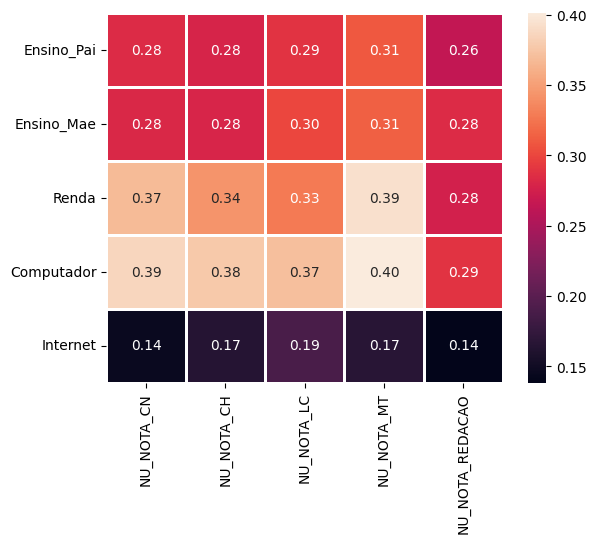

In [24]:

corr1 = corr.filter(items=["Ensino_Pai", "Ensino_Mae", "Renda", "Computador", "Internet"], axis=0)
corr2 = corr1[['NU_NOTA_CN', 'NU_NOTA_CH', "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]]
corr2
plot = sns.heatmap(corr2, annot = True, fmt="0.2f", linewidths=1)
fig = plot.get_figure()

## Feature Engineering
Combinamos os dados para observar mais claramente as correlações.

### Educação dos pais

$$
Educação \ dos\ Pais = Educação \ do\ Pai * Educação \ da\ Mãe
$$

### Média da prova

$$
Média \ da \ Prova = \frac{CN + CH + LC + MT}{4}
$$

### Renda per capita

$$
per\ capita = \frac{Renda}{tamanho\ da\ familia}
$$


In [25]:
df['Ensino_Pais'] = df['Ensino_Pai'] * df['Ensino_Mae']
df['NotaTotal'] = df[['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_CH']].sum(axis=1) / 4
df['perCapita'] = df['Renda'] / df['Pessoas_casa']

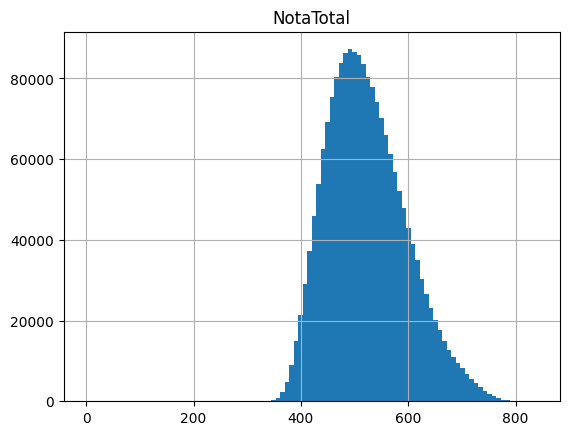

In [26]:
df.hist('NotaTotal', bins = 100)
plt.show()

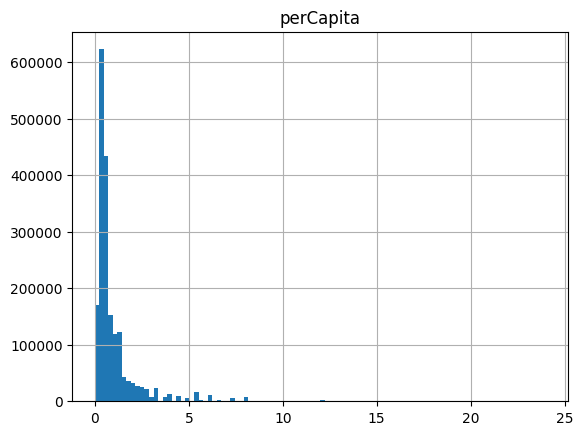

In [27]:
df.hist('perCapita', bins = 100)
plt.show()

<Figure size 1200x600 with 0 Axes>

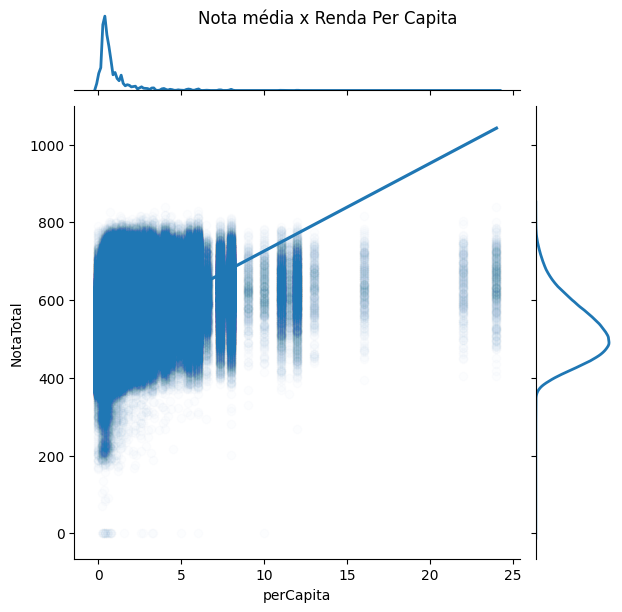

In [28]:
plt.figure(figsize = (12, 6))
g = sns.JointGrid()
x, y = df["perCapita"], df["NotaTotal"]
plt.suptitle("Nota média x Renda Per Capita")
sns.regplot(x = x, y = y, ax=g.ax_joint, scatter_kws = {'alpha' : 1/100})
sns.kdeplot(x = x, fill = False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y = y, fill = False, linewidth=2, ax=g.ax_marg_y)
plt.show()

<Figure size 1200x600 with 0 Axes>

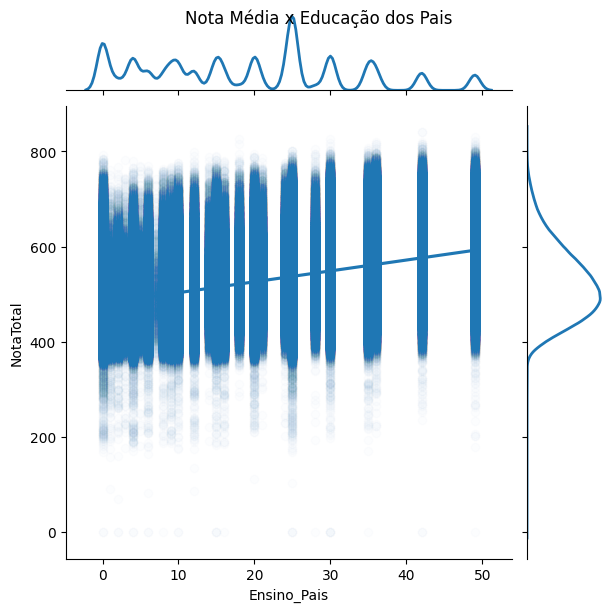

In [29]:
plt.figure(figsize = (12, 6))
g = sns.JointGrid()
x, y = df["Ensino_Pais"], df["NotaTotal"]
plt.suptitle("Nota Média x Educação dos Pais")
sns.regplot(x = x, y = y, ax=g.ax_joint, scatter_kws = {'alpha' : 1/100})
sns.kdeplot(x = x, fill = False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y = y, fill = False, linewidth=2, ax=g.ax_marg_y)
plt.show()

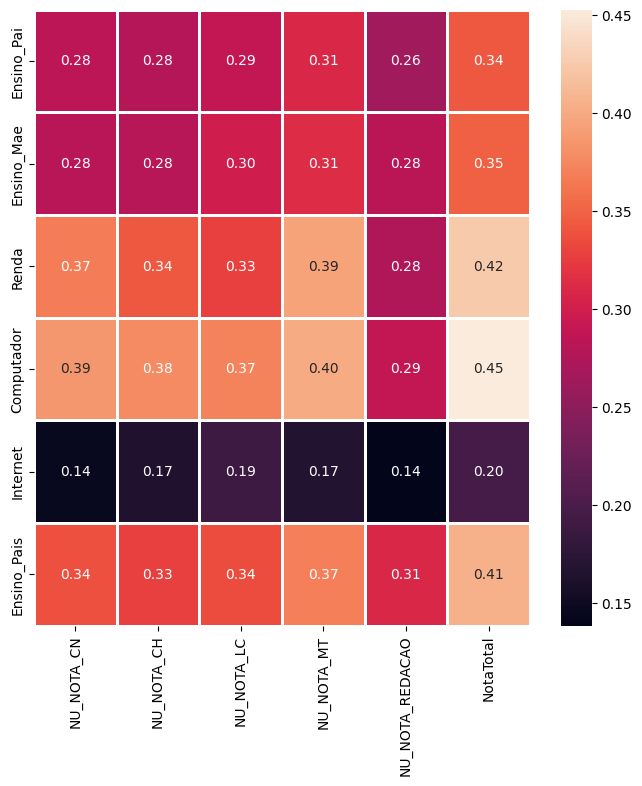

In [30]:
selected_columns = ['Ensino_Pai', 'Ensino_Mae', 'Renda', 'Computador', 'Internet', "Ensino_Pais", "perCapita", 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NotaTotal']
corr = df[selected_columns].corr()
corr1 = corr.filter(items=["Ensino_Pai", "Ensino_Mae", "Renda", "Computador", "Internet", "Ensino_Pais", "Renda per Capita"], axis=0)
corr2 = corr1[['NU_NOTA_CN', 'NU_NOTA_CH', "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "NotaTotal"]]
corr2
plt.figure(figsize = (8, 8))
plot = sns.heatmap(corr2, annot = True, fmt="0.2f", linewidths=1)
fig = plot.get_figure()

## Identificação de Outliers

### Os melhores 1000 desempenhos contra o desempenho geral


In [32]:
newCol = [1 if i < 1000 else 0 for i in range(len(df))]
df.sort_values('NotaTotal', ascending=False, inplace=True)
df['Top1000'] = newCol
cols = cols = ["TP_FAIXA_ETARIA", "Ensino_Pai", "Ensino_Mae", "Renda", "Computador", "Internet", "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO", "perCapita", "Ensino_Pais", "NotaTotal", "Top1000"]
top1000 = df.head(1000)
top1000[cols].describe()

,TP_FAIXA_ETARIA,Ensino_Pai,Ensino_Mae,Renda,Computador,Internet,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,perCapita,Ensino_Pais,NotaTotal,Top1000
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,4.70,6.02,6.16,12.97,2.36,1.00,764.25,743.45,695.74,922.98,914.66,3.97,37.70,781.61,1.00
std,2.60,1.26,1.04,7.65,1.10,0.05,33.04,32.47,29.26,34.05,52.92,3.29,10.41,10.52,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,674.40,655.80,601.70,814.40,580.00,0.00,0.00,769.98,1.00
25%,3.00,5.00,6.00,6.60,1.00,1.00,741.70,721.20,675.30,901.20,895.00,1.80,30.00,773.52,1.00
50%,4.00,6.00,6.00,11.50,2.00,1.00,761.25,740.80,694.95,924.50,920.00,3.25,42.00,778.72,1.00
75%,6.00,7.00,7.00,22.00,3.00,1.00,783.82,765.90,713.62,948.00,960.00,5.50,49.00,786.72,1.00
max,15.00,7.00,7.00,24.00,4.00,1.00,875.30,839.20,801.00,985.70,1000.00,24.00,49.00,839.80,1.00


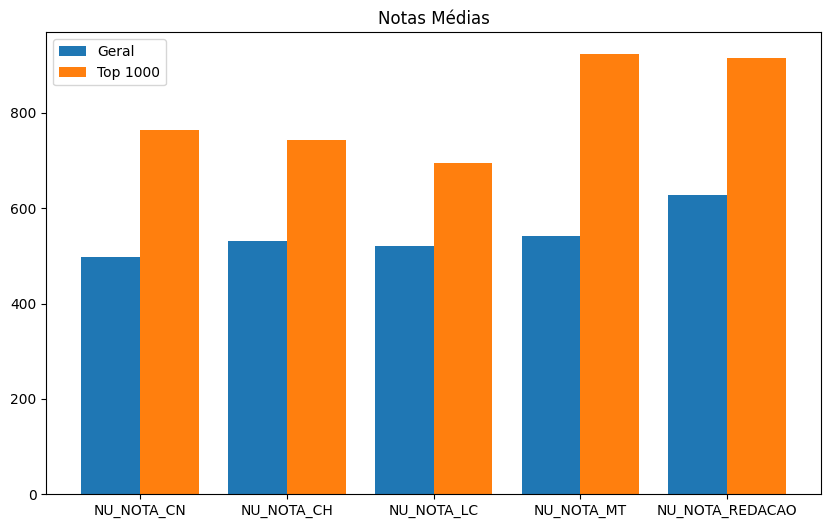

In [33]:
scores = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
top1000scores = top1000[scores].mean()
globalscores = df[scores].mean()
plt.figure(figsize = (10, 6))
plt.title("Notas Médias")
plt.bar(np.arange(5) - 0.2, globalscores, width=0.4, label = "Geral")
plt.bar(np.arange(5) + 0.2, top1000scores, width=0.4, label = "Top 1000")
plt.xticks(np.arange(5), scores)
plt.legend()
plt.show()

### Renda per Capita: Top1000 vs. Geral

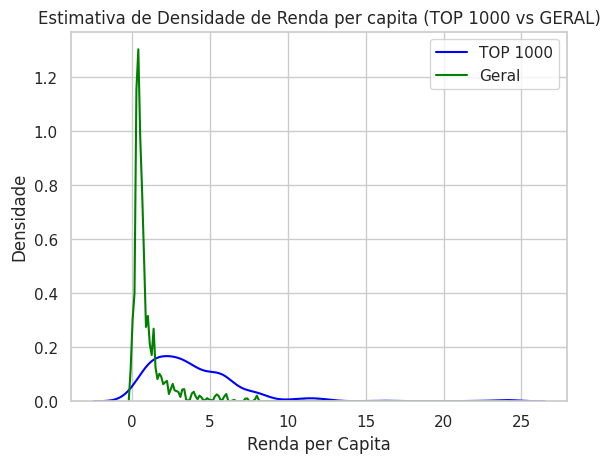

In [34]:
sns.set(style="whitegrid")
colors = ["blue", "green"]
sns.kdeplot(data=top1000['perCapita'], color=colors[0], label='TOP 1000')
sns.kdeplot(data=df['perCapita'], color=colors[1], label='Geral')
plt.title('Estimativa de Densidade de Renda per capita (TOP 1000 vs GERAL)')
plt.xlabel('Renda per Capita')
plt.ylabel('Densidade')
plt.legend()
plt.show()


### Educação dos pais: Top1000 x Geral

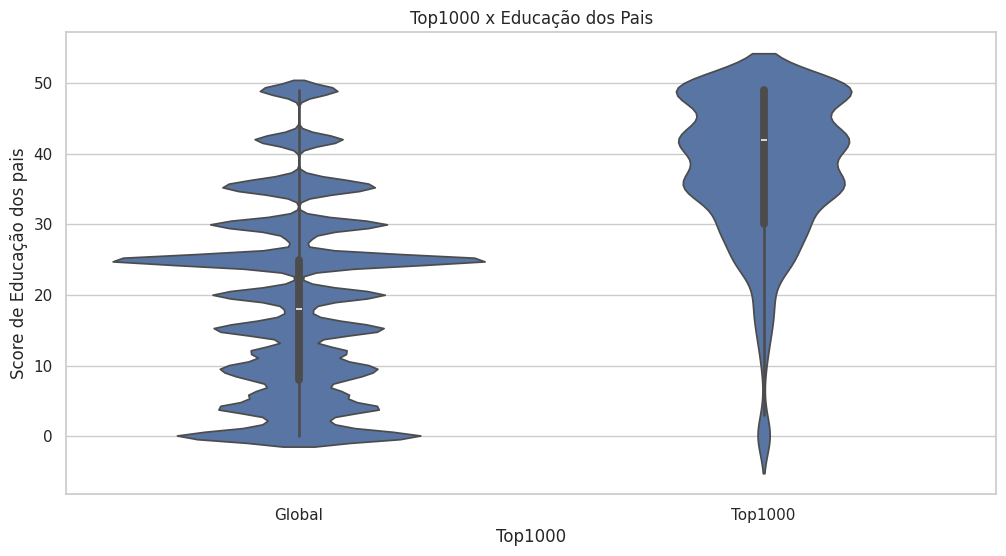

In [35]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Top1000", y="Ensino_Pais")
plt.xticks([0, 1], ["Global", "Top1000"])
plt.title("Top1000 x Educação dos Pais")
plt.ylabel('Score de Educação dos pais')
plt.show()



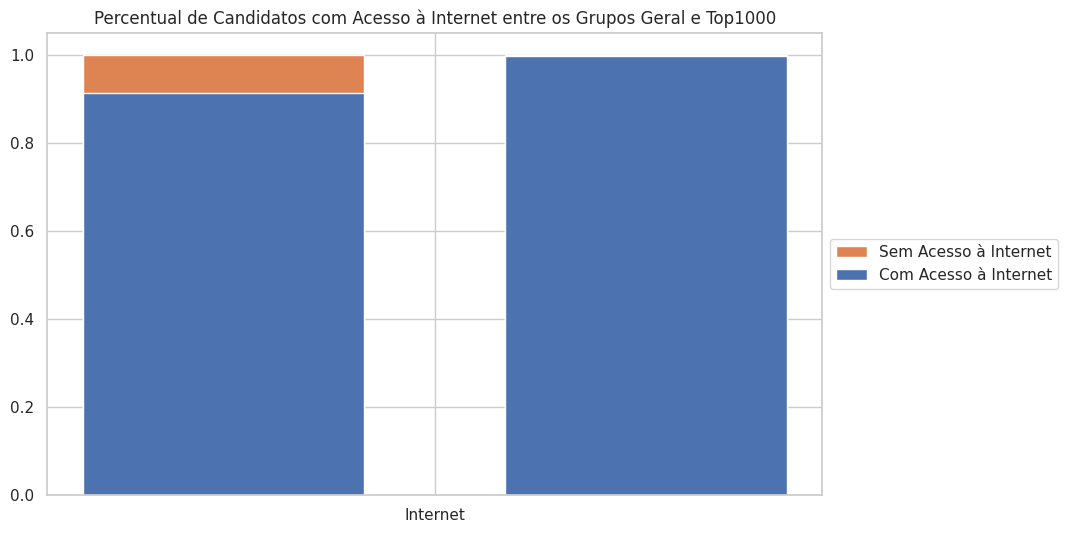

In [36]:
scores = ["Internet"]
top1000scores = top1000[scores].mean()
globalscores = df[scores].mean()
plt.figure(figsize=(10, 6))
plt.title("Percentual de Candidatos com Acesso à Internet entre os Grupos Geral e Top1000")
plt.bar([0.7], 1, width=0.4, color='C1', label='Sem Acesso à Internet')
plt.bar([0.7], globalscores, width=0.4, label="Com Acesso à Internet", color='C0')
plt.bar([1.3], 1, width=0.4, color='C1')
plt.bar([1.3], top1000scores, width=0.4)
plt.xticks([1], scores)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()


## Conclusões
Existe forte correlação entre obter bom desempenho nas provas do ENEM e alta renda familiar. Ao separar o grupo dos Top 1000 ficou ainda mais evidente que as características daqueles que apresentam melhor performance nas provas está associada a serem de famílias com renda superior. O que se também se reflete em um maior acesso à tecnologia: um grupo que tem mais computadores em casa e mais acesso à internet. 
Os candidatos com melhor performance também possuem maior uniformidade na formação dos pais, os quais em geral posuem mais anos de estudos. 
